<a href="https://colab.research.google.com/github/Gllitch404/Gllitch404/blob/main/Implementa%C3%A7%C3%A3oIAearquivoHcomPesos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TensorFlow

Instalando o tensorFlow

In [ ]:
!pip install tensorflow

Area de trinamento

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 376s 477ms/step - accuracy: 0.2618 - loss: 1.9669 - val_accuracy: 0.5067 - val_loss: 1.3207
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 378s 472ms/step - accuracy: 0.5302 - loss: 1.3039 - val_accuracy: 0.6106 - val_loss: 1.0842
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 389s 481ms/step - accuracy: 0.6304 - loss: 1.0530 - val_accuracy: 0.6958 - val_loss: 0.8707
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 389s 490ms/step - accuracy: 0.6933 - loss: 0.8837 - val_accuracy: 0.7254 - val_loss: 0.7970
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 424s 467ms/step - accuracy: 0.7346 - loss: 0.7742 - val_accuracy: 0.7369 - val_loss: 0.7694
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 383s 468ms/step - accuracy: 0.7646 - loss: 0.6822 - val_accuracy: 0.7554 - val_loss: 0.7111
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 385s 472ms/step - accuracy: 0.7955 - loss: 0.5949 - val_accuracy: 0.7657 - val_loss: 0.6934
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 380s 470ms/step - accuracy: 0.8121 -

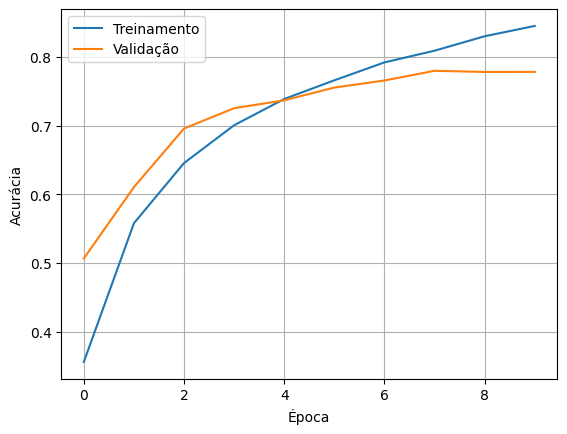

2.18.0


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models  # Import layers and models from tensorflow.keras
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data() # Dataset

x_train = x_train / 255.0  # Normaliza a data
x_test = x_test / 255.0    # Normaliza a data




model = keras.Sequential([ #Cria o modelo
    # Bloco 1
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Bloco 2
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Bloco 3
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    # Camadas finais
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # ajuda contra overfitting
    layers.Dense(10, activation='softmax')  # saída CIFAR-10 tem 10 classes
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))


test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nAcurácia no teste: {test_acc:.2f}')




plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

print(tf.__version__)


Area de testes

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


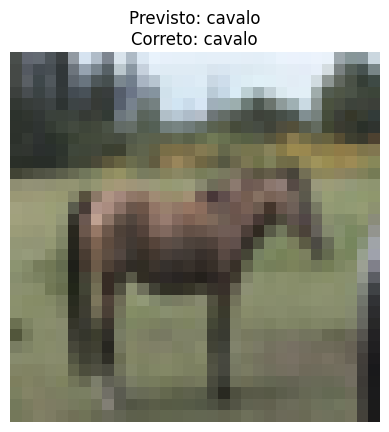

In [23]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['avião', 'automóvel', 'pássaro', 'gato', 'cervo',
               'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

# Escolhe uma imagem do conjunto de teste (exemplo: índice 0)
img_index = -1
img = x_test[img_index]
true_label = y_test[img_index][0]
# Faz predição (o modelo espera uma batch, então usamos expand_dims)
predictions = model.predict(np.expand_dims(img, axis=0))
predicted_class = np.argmax(predictions)



# Mostra a imagem e o resultado
plt.imshow(img)
plt.title(f'Previsto: {class_names[predicted_class]}\nCorreto: {class_names[true_label]}')
plt.axis('off')
plt.show()

Codigo gerador dos .h com os bias e os pesos

In [25]:
import numpy as np
import os

# Criando a pasta e o arquivo onde os dados vão ficar
saida = "pesos_cnn"
os.makedirs(saida, exist_ok=True)

header_path = os.path.join(saida, "pesos_cnn.h")

def format_array_float(name, array): # Metodo para criar os arrays com pesos e bias
    flat = array.flatten()
    valores = ', '.join(f'{v:.8f}' for v in flat)
    return f"float {name}[{len(flat)}] = {{ {valores} }};\n"

def format_array_int(name, shape): # Esse é para criar os vetores com os shapes
    valores = ', '.join(str(v) for v in shape)
    return f"int {name}[{len(shape)}] = {{ {valores} }};\n"

# Abre o arquivo criado lá em cima e escreve os valores da CNN no arquivo
with open(header_path, "w") as hfile:
    hfile.write("// Arquivo gerado automaticamente com pesos, bias e shapes da CNN\n") # Comentario
    hfile.write("#pragma once\n\n") # Essa parte evita que o compilador crie duas vezes caso seja chamado mais de uma vez

    for i, layer in enumerate(model.layers): #Percorre todas as layers
        weights = layer.get_weights()
        if weights: # Algumas camadas não tem weights então usamos isso
            pesos, bias = weights[0], weights[1]
            shape_pesos = pesos.shape
            shape_bias = bias.shape

            nome_pesos = f"pesos_layer{i}"
            nome_bias = f"bias_layer{i}"
            nome_shape_pesos = f"{nome_pesos}_shape"
            nome_shape_bias = f"{nome_bias}_shape"

            hfile.write(format_array_float(nome_pesos, pesos))
            hfile.write(format_array_int(nome_shape_pesos, shape_pesos))
            hfile.write("\n")

            hfile.write(format_array_float(nome_bias, bias))
            hfile.write(format_array_int(nome_shape_bias, shape_bias))
            hfile.write("\n")
